In [9]:
import numpy as np
import math
from qiskit import *
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit import Gate

In [258]:
epsilon = 0.8
theta = np.arccos(1-epsilon)

In [240]:
qasm_string="""OPENQASM 2.0;
include "qelib1.inc";
qreg q[6];
creg c[4];
x q[0];
barrier;
cx q[0], q[2];
cx q[1], q[2];
ry(-th) q[2];
cx q[1], q[2];
cx q[0], q[2];
ry(th) q[2];
measure q[2] -> c[0];
barrier;
cx q[0], q[3];
cx q[1], q[3];
ry(-th) q[3];
cx q[1], q[3];
cx q[0], q[3];
ry(th) q[3];
measure q[3] -> c[1];
barrier;
cx q[0], q[4];
cx q[1], q[4];
ry(-th) q[4];
cx q[1], q[4];
cx q[0], q[4];
ry(th) q[4];
measure q[4] -> c[2];
barrier;
cx q[0], q[5];
cx q[1], q[5];
ry(-th) q[5];
cx q[1], q[5];
cx q[0], q[5];
ry(th) q[5];
measure q[5] -> c[3];"""

In [259]:
qasm_string_th=qasm_string.replace("th",str(theta))
qasm_string_th.split('\n')
qc = QuantumCircuit.from_qasm_str(qasm_string_th)

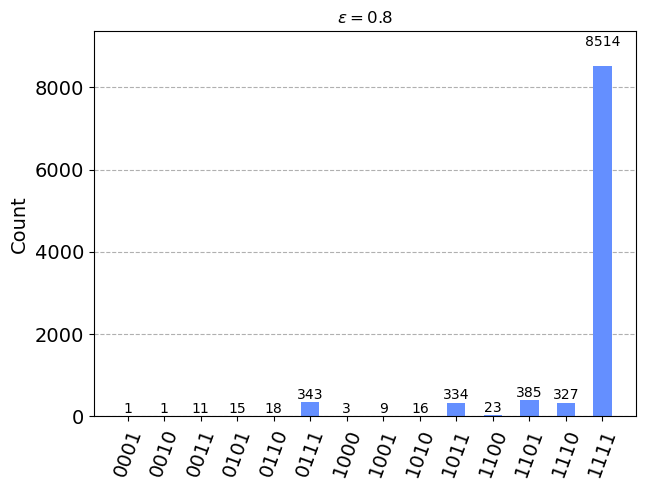

In [260]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)
shots = 10000
experiment = simulator.run(circ, shots=shots, memory = True).result()
counts = experiment.get_counts(circ)
# measurement = np.array([list(map(int, reversed(string))) for string in memory])
plot_histogram(counts, title=f"$\epsilon = {epsilon}$")

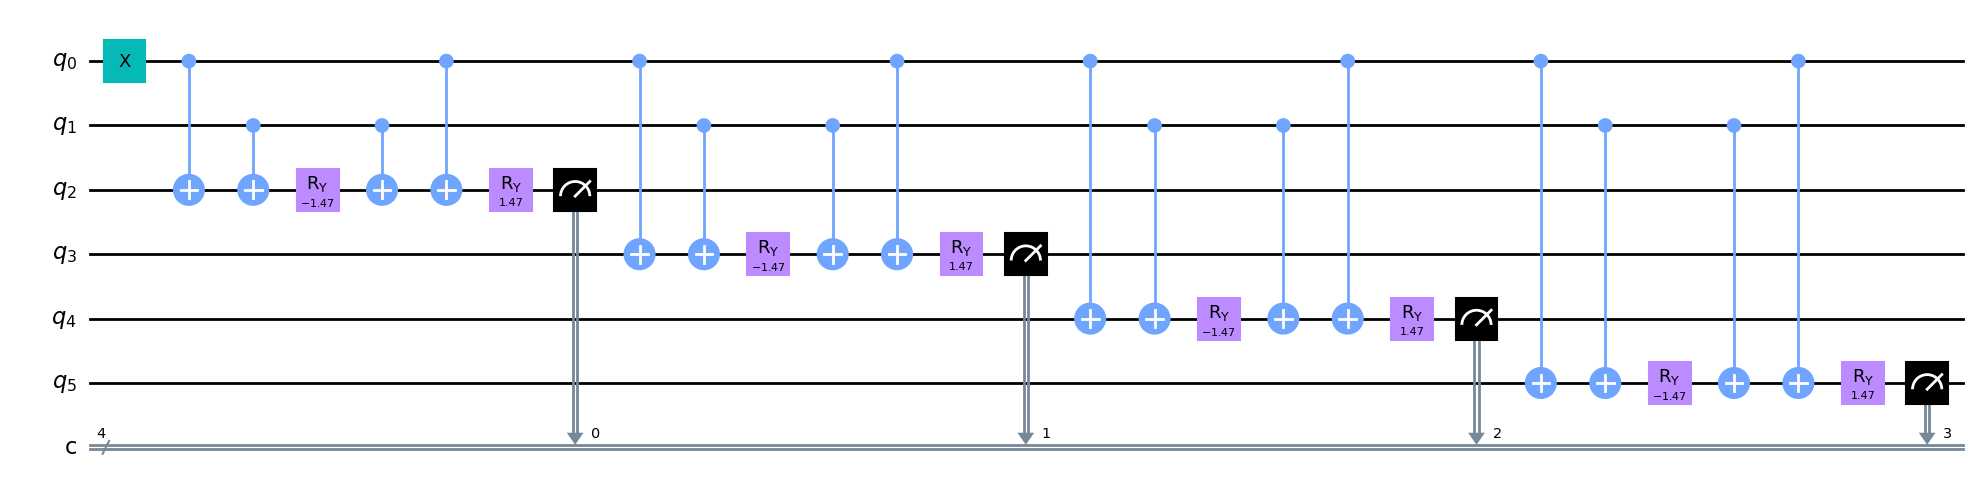

In [243]:
# Print the circuit
qc.draw(output='mpl',plot_barriers=False,fold=30)

array([[0, 0],
       [1, 1]])